In [22]:
from PIL import Image

from astropy.io import fits

import matplotlib 

import matplotlib.pyplot as plt



def get_center(img_with_pth):
    im = Image.open(img_with_pth).convert('RGB')

    x, y = im.size
    
    coords = []

    for y_indx in range(y):
        for x_indx in range(x):
   
            red, green, blue = im.getpixel((x_indx, y_indx))


            if red != 0 and green != 0 and blue != 0 and red > 30 and green > 30 and blue > 30:
                coords.append((x_indx, y_indx))

    max_x, max_y = coords[0]
    min_x, min_y = coords[0]

    for cord in coords:
        temp_x, temp_y = cord

        if temp_x > max_x:
            max_x = temp_x

        if temp_y > max_y:
            max_y = temp_y

        if temp_x < min_x:
            min_x = temp_x

        if temp_y < min_y:
            min_y = temp_x
            
    center_x = (float(max_x)+min_x)/2

    center_y = (float(max_y)+min_y)/2
    
    return (center_x, center_y)

In [2]:
def max_min_xy(img_with_pth):
    im = Image.open(img_with_pth).convert('RGB')

    x, y = im.size
    
    coords = []

    for y_indx in range(y):
        for x_indx in range(x):
   
            red, green, blue = im.getpixel((x_indx, y_indx))


            if red != 0 and green != 0 and blue != 0 and red > 30 and green > 30 and blue > 30:
                coords.append((x_indx, y_indx))

    max_x, max_y = coords[0]
    min_x, min_y = coords[0]

    for cord in coords:
        temp_x, temp_y = cord

        if temp_x > max_x:
            max_x = temp_x

        if temp_y > max_y:
            max_y = temp_y

        if temp_x < min_x:
            min_x = temp_x

        if temp_y < min_y:
            min_y = temp_x
            
#     center_x = (float(max_x)+min_x)/2

#     center_y = (float(max_y)+min_y)/2
    
    return (min_x, min_y, max_x, max_y)

In [13]:
base_path_to_config_file = '/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/'
config_file_name = 'config-i-0.fits'
cfile_w_path = base_path_to_config_file+config_file_name
temp_img_file_dir = './temp_img/'
cropped_img_file_dir = './test/' 

In [6]:
image_data = fits.getdata(cfile_w_path)

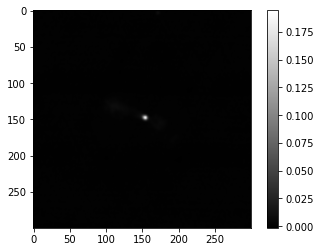

In [7]:

plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [15]:

tmp_img_name = 'temp.png'

matplotlib.image.imsave(temp_img_file_dir+tmp_img_name, image_data, cmap='gray')

In [16]:
t_im = Image.open(temp_img_file_dir+tmp_img_name)

In [18]:
x_cnt, y_cnt = get_center(temp_img_file_dir+tmp_img_name)

In [19]:
cropped = t_im.crop((x_cnt-75, y_cnt-75, x_cnt+75, y_cnt+75))

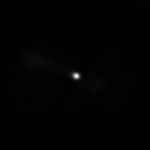

In [20]:
display(cropped)

In [21]:
cropped.save(cropped_img_file_dir+config_file_name[:-5]+'.png')

In [23]:
def fits_cropper(base_path_to_config_file, config_file_name, temp_img_file_dir, cropped_img_file_dir, disp=True):
        cfile_w_path = base_path_to_config_file+config_file_name
        image_data = fits.getdata(cfile_w_path)
        
        if (disp == True):
            print('Temp Image: ' + str(image_data.size))
            plt.imshow(image_data, cmap='gray')
            plt.colorbar()
            
        tmp_img_name = 'temp.png'

        matplotlib.image.imsave(temp_img_file_dir+tmp_img_name, image_data, cmap='gray')
    
        t_im = Image.open(temp_img_file_dir+tmp_img_name)
        
        x_cnt, y_cnt = get_center(temp_img_file_dir+tmp_img_name)
        
        cropped = t_im.crop((x_cnt-75, y_cnt-75, x_cnt+75, y_cnt+75))
        
        if (disp == True):
            print('Cropped Image: ' + str(cropped.size))
            display(cropped)
        
        cropped.save(cropped_img_file_dir+config_file_name[:-5]+'.png')

Temp Image: 90000
Cropped Image: (150, 150)


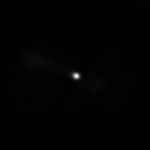

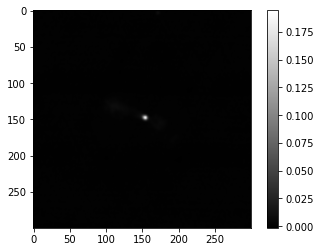

In [24]:
fits_cropper('/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/', 'config-i-0.fits', './temp_img/', './test/', disp=True)

In [25]:
type(t_im)

PIL.PngImagePlugin.PngImageFile